# 데이터 읽기

무비렌즈의 유저의 정보(u.user) 읽기

In [ ]:
import os
import pandas as pd
#베이스 경로 설정
base = '/content/drive/MyDrive/RecoSys/Data'

# u.user 파일 경로 설정
u_user_path = os.path.join(base, 'u.user')

#필요한 컬럼 정의
u_cols = ['user_id','age','sex','occupation','zip_code']

#데이터 읽어오기
users = pd.read_csv(u_user_path, sep='|', names = u_cols, encoding='latin-1')
#users 데이터 프레임에 인덱스(user_id) 지정
users = users.set_index('user_id')

#상위 5개
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


무비렌즈의 영화의 정보(u.item) 읽기

In [ ]:
#u.item의 파일 경로 설정
u_item_path = os.path.join(base, 'u.item')

#필요한 컬럼 정의
i_cols = ['movie_id','title','release date','video release date','IMDB URL','unknown','Action',
          'Adventure','Animation','Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy','Film-Noir','Horror','Musical', 'Mystery','Romance','Sci-Fi','Thriller','War','Western']

# 데이터 읽어오기
movies = pd.read_csv(u_item_path, sep='|',names =i_cols, encoding='latin-1')
# movies 데이터 프레임에 인덱스(movie_id) 지정
movies = movies.set_index('movie_id')

#상위 5개
movies.head()

,title,release date,video release date,IMDB URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


무비렌즈의 평점 정보(u.data)읽기

In [ ]:
#u.data의 파일경로 지정
u_data_path = os.path.join(base, 'u.data')

#필요한 컬럼 정의
r_cols = ['user_id', 'movie_id','rating','timestamp']

#데이터 읽어오기
ratings = pd.read_csv(u_data_path, sep='\t',names = r_cols, encoding='latin-1')

#ratings 데이터 프레임에 인덱스(user_id) 지정
ratings = ratings.set_index('user_id')

#상위 5개
ratings.head()

,movie_id,rating,timestamp
user_id,,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596


# 인기 제품 방식 추천

영화의 평균을 계산하여 평균값이 높은 영화를 추천하는 방식

In [ ]:
# 인기 제품 방식 추천 function
def recom_movie(n_items):
  
  #영화별 평균을 계산
  movie_mean = ratings.groupby(['movie_id'])['rating'].mean()

  #평균을 내림차순으로 정렬후에 상위 n_items만 반환
  movie_sort = movie_mean.sort_values(ascending=False)[:n_items]

  #상위 n_item의 영화의 인덱스를 movie 데이터프레임에서 찾음
  recom_movies = movies.loc[movie_sort.index]

  #추천 받은 영화의 'title'만 추출
  recommendations = recom_movies['title']
  return recommendations

In [ ]:
recom_movie(5)

movie_id
814                         Great Day in Harlem, A (1994)
1599                        Someone Else's America (1995)
1201           Marlene Dietrich: Shadow and Light (1996) 
1122                       They Made Me a Criminal (1939)
1653    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object

#정확도(RMSE) 측정

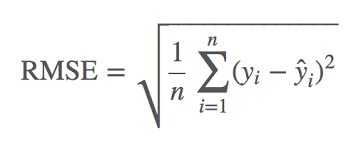


사용자가 내린 평점과 추천시스템이 내린 평점과의 차이를 알아볼 수 있다.

평점의 차이가 적다면 추천시스템의 성능이 좋은 것이고 차이가 크다면 추천시스템의 성능이 좋지 않은 것이다.

하지만 **우리의 목표는 제품을 추천하는 것이지 제품의 평점을 예측하는 것은 아니기 때문에 주의해야할 필요가 있다.**

*실제 평점과 예측 평점의 차이를 보는 것이라면 MSE나 MAE같은 평가지표도 가능하지 않을까?*

In [ ]:

import numpy as np
#best-seller 방식으로 구한 예측값의 RMSE를 계산하는 코드
def RMSE(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

#정확도(RMSE) 계산
rmses = []
#movie_id를 그룹화하여 rating 컬럼의 평균을 매긴 데이터프레임을 생성
movie_mean = ratings.groupby(['movie_id'])['rating'].mean()

#user id를 하나씩 확인하면서
for user in set(ratings.index):
  # user에 해당하는 rating의 값을 y_true로 할당
  y_true = ratings.loc[user]['rating']
  # best-seller 방식
  # 위에서 만든 movie_mean데이터 프레임에 user의 movie_id에 해당하는 값을 전달하여
  # 평균을 구함
  y_pred = movie_mean[ratings.loc[user]['movie_id']]
  #RMSE 계산
  rmse = RMSE(y_true, y_pred)
  rmses.append(rmse)


#RMSE 계산
print(np.mean(rmses))


0.996007224010567
